<a href="https://colab.research.google.com/github/logeshpalanivel/EEG_Eye_State_Classification/blob/main/EEG_Eye_State_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/EEG_Eye_State_Classification.csv")

In [3]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
df.tail()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1
14979,4287.69,3997.44,4260.00,4121.03,4333.33,4616.41,4088.72,4638.46,4212.31,4226.67,4167.69,4274.36,4597.95,4350.77,1


In [5]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [6]:
df.shape

(14980, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [8]:
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

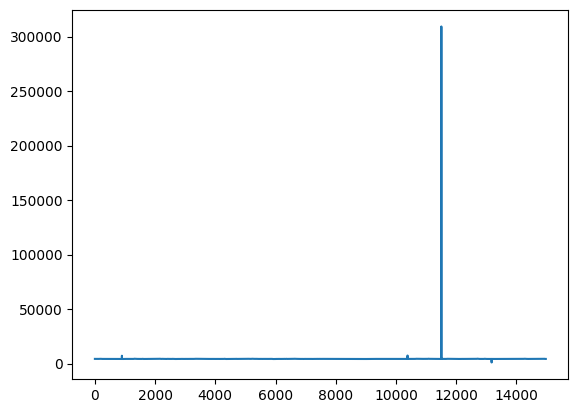

In [9]:
a=df['AF3']
plt.plot(a)

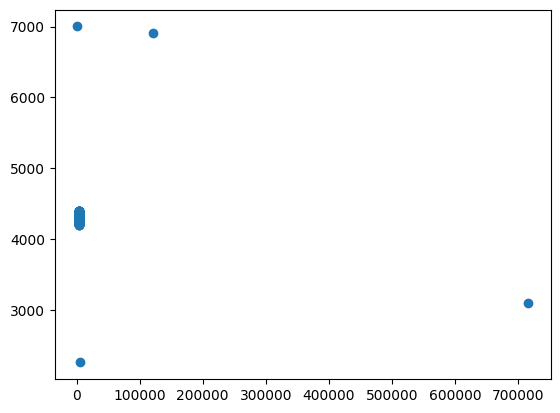

In [11]:
b=df['AF4']
c=df['F4']
plt.scatter(b,c)

<BarContainer object of 14980 artists>

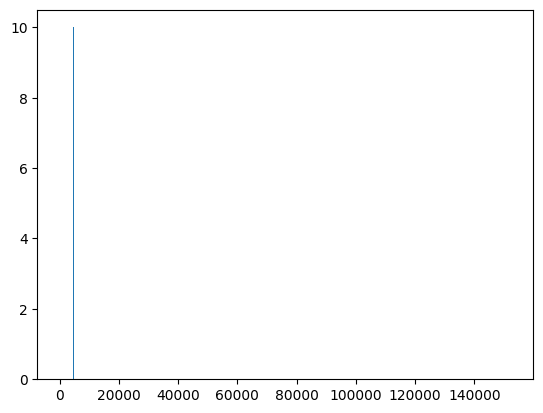

In [12]:
d=df['F8']
plt.bar(d,width=10,height=10)

(array([1.4979e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  2453.33 ,  66464.397, 130475.464, 194486.531, 258497.598,
        322508.665, 386519.732, 450530.799, 514541.866, 578552.933,
        642564.   ]),
 <BarContainer object of 10 artists>)

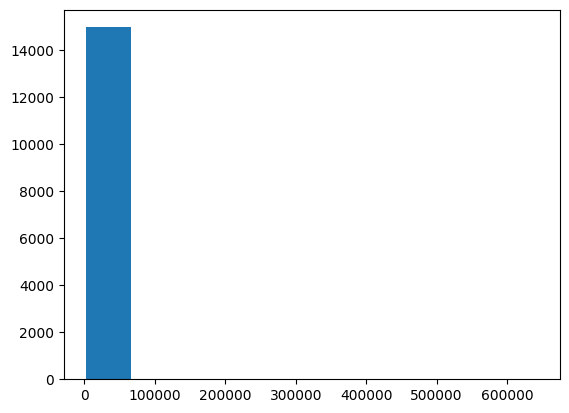

In [14]:
e=df['FC5']
plt.hist(e)

In [16]:
 X = df.drop('eyeDetection',axis=1)


In [17]:
Y = df['eyeDetection']

In [18]:
X

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


In [19]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
14975    1
14976    1
14977    1
14978    1
14979    1
Name: eyeDetection, Length: 14980, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [21]:
x_train.shape

(11235, 14)

In [22]:
x_test.shape

(3745, 14)

In [23]:
from sklearn.preprocessing import StandardScaler
c = StandardScaler()
x_train = c.fit_transform(x_train)
x_train

array([[-2.08540921e-02, -6.36263367e-01, -2.94955825e-01, ...,
        -3.55581566e-01, -1.81022896e-02, -4.23123634e-01],
       [-8.02178997e-03,  6.35008112e-01,  4.11324784e-01, ...,
         1.87536654e-01, -7.43160497e-03, -2.74597080e-01],
       [-7.84452902e-03,  1.02360012e+00,  9.41733005e-02, ...,
         1.47021253e-01,  2.84562141e-04, -4.12573145e-02],
       ...,
       [-1.53311972e-02, -5.62723815e-01,  7.85636300e-03, ...,
        -5.32207531e-01, -1.73636602e-02, -1.26070527e-01],
       [ 1.14073999e-02,  1.06559346e+00,  1.72351093e+00, ...,
         1.35559832e+00,  3.22822737e-02,  1.04083516e+00],
       [-1.78267532e-02, -1.73926962e-01, -2.08638887e-01, ...,
        -1.24670261e-01, -2.14081939e-02, -5.71650187e-01]])

In [24]:
from sklearn.tree import DecisionTreeClassifier
a= DecisionTreeClassifier()
a.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred =a.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
a

0.5412550066755675

In [30]:
c

array([[2027,    0],
       [1718,    0]])

In [34]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)

SVC()

In [45]:
y_pred1 = clf.predict(x_test)
y_pred1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred1)
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred1)
a

0.5412550066755675

In [47]:
c

array([[2027,    0],
       [1718,    0]])

In [41]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg

LogisticRegression()

In [49]:
y_pred2 = lg.predict(x_test)
y_pred2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [50]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred2)
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred2)
a

0.45927903871829107

In [51]:
c

array([[   2, 2025],
       [   0, 1718]])